In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("Ecommerce Customers") #loading a file into pandas and saving it into the variable called "df".

In [13]:
df.head() #Let's look how the dataset looks like

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
df.info() #Let's see wjat datatype each variable actually is. We gonna work mostly with variables from column 3 to 7 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
df.describe(
) # a bit more statistical info about each variable. Here we see that avg session length is 33 mins, and std is 0.99 which can tell us that most of the sessions are close to 33mins

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


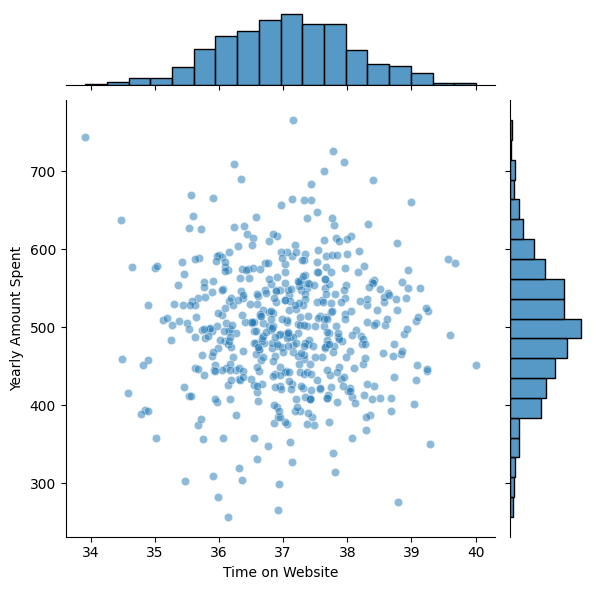

In [16]:
#EDA - Exploratory data analysis
sns.jointplot(x = "Time on Website", y ="Yearly Amount Spent", data=df, alpha = 0.5)
#The scatter:

#No strong linear pattern

#Points are widely scattered

#Looks almost like a cloud

#So Time on Website doesn’t appear to predict Yearly Amount Spent very well.

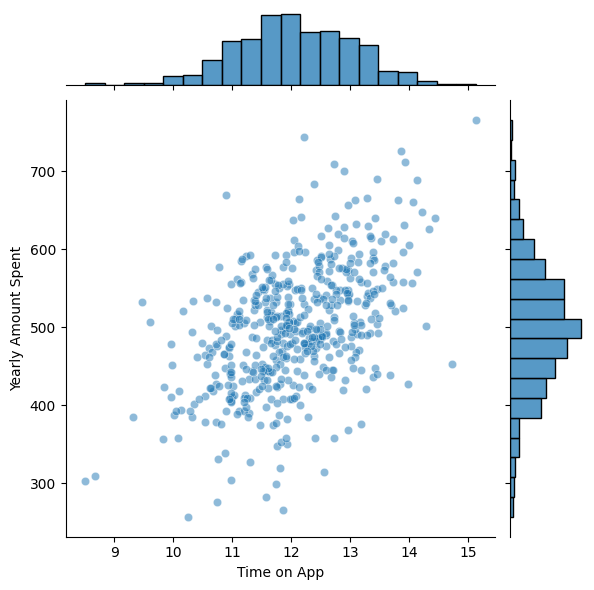

In [17]:
sns.jointplot(x = "Time on App", y ="Yearly Amount Spent", data=df, alpha = 0.5)

# There seems to be a positive relationship. 
# We can set an alternative hypothesis -> There is a positive correlation between Time on App and Yearly Amount Spent. But we can't fully accept it 

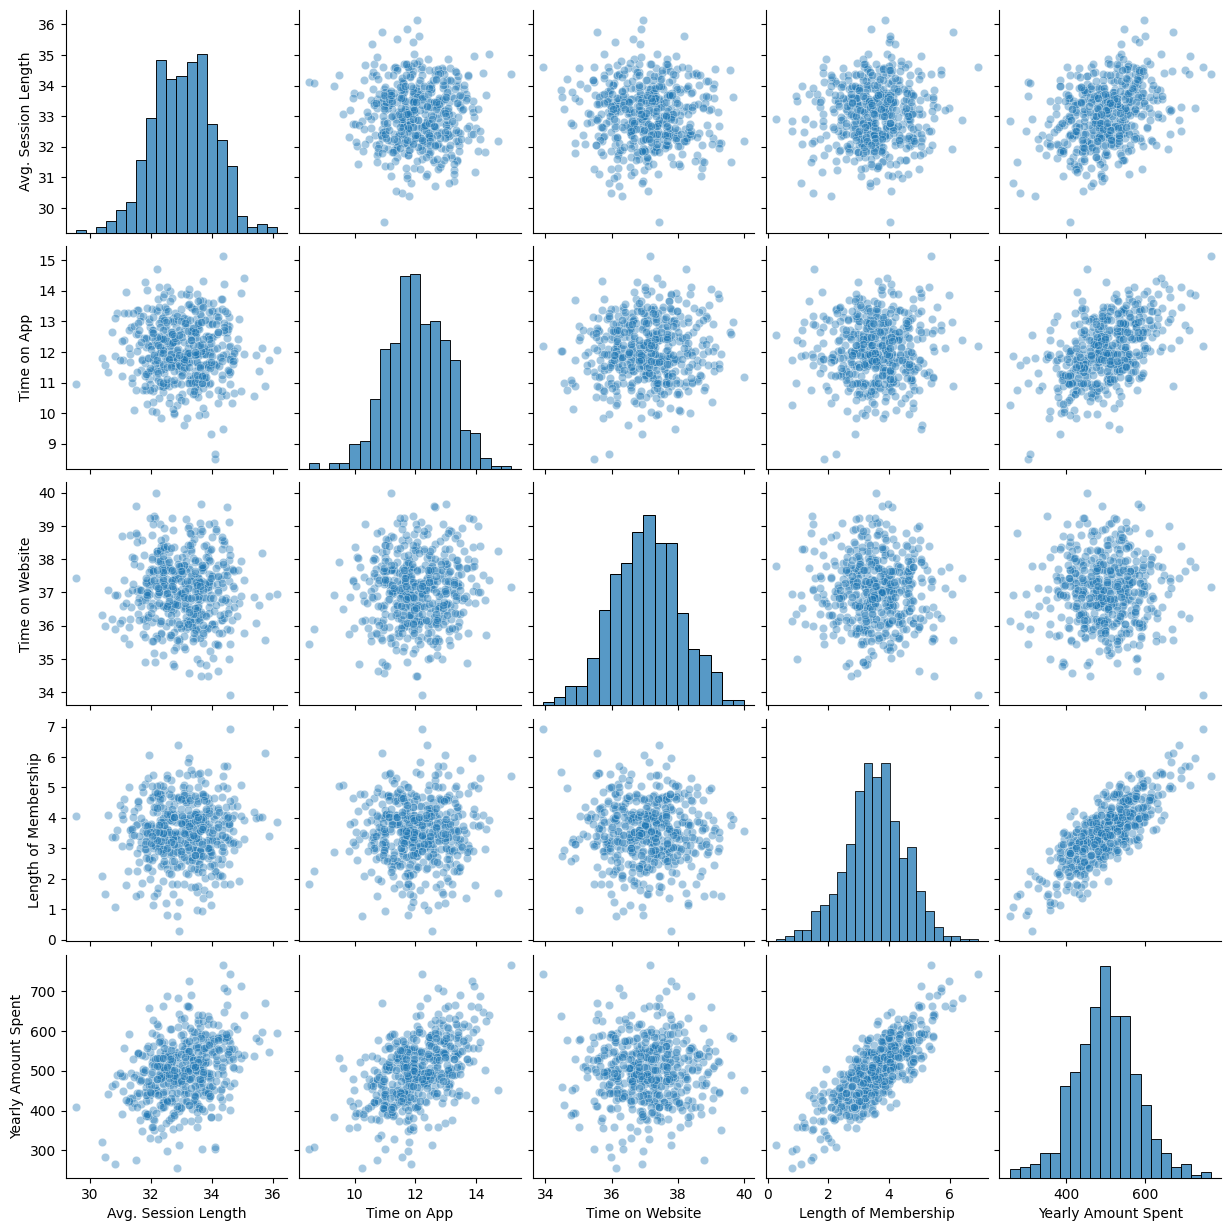

In [18]:
sns.pairplot(df, kind = "scatter", plot_kws = {'alpha': 0.4}) # The most interesting part for us is the yearly amount spent. 

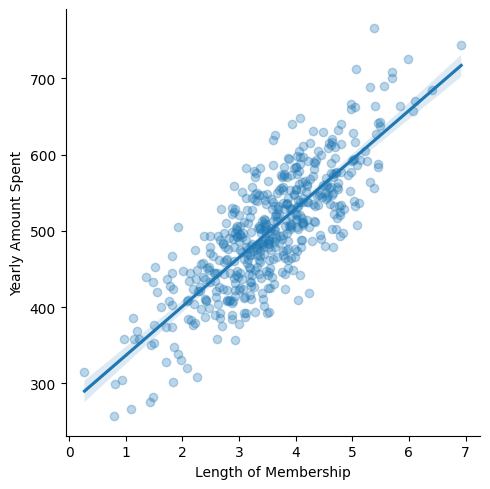

In [19]:
sns.lmplot(x = 'Length of Membership',
           y = 'Yearly Amount Spent',
           data = df, 
           scatter_kws= {'alpha': 0.3})

In [20]:
from sklearn.model_selection import train_test_split #This one will allow us to split our data into training data set and test dataset. 

In [21]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Splitting data into test and train datasets, with 30% for test set

In [23]:
#Training the model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train, y_train) #Given this X, the model should return Y -> the process of learning for model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
lm.coef_ # Return of the coefficients of the linear regression.

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [27]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [28]:
#predictions
predictions = lm.predict(X_test)


In [29]:
predictions 

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

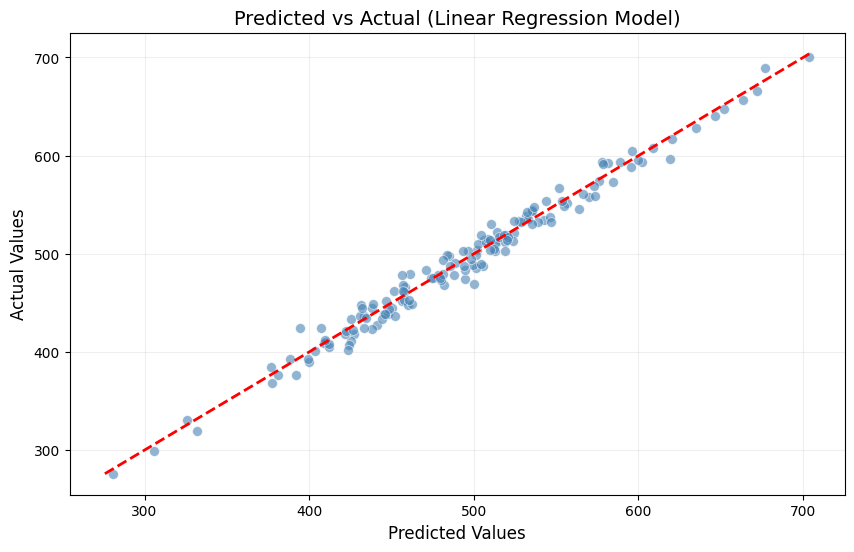

In [ ]:
#Evaluationg a predictive power of the model
plt.figure(figsize=(10,6))

sns.scatterplot(x=predictions, y=y_test, alpha=0.6, s=50, color='steelblue')

lims = [
    np.min([predictions.min(), y_test.min()]),
    np.max([predictions.max(), y_test.max()])
]
plt.plot(lims, lims, 'r--', linewidth=2)

plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Actual Values", fontsize=12)
plt.title("Predicted vs Actual (Linear Regression Model)", fontsize=14)
plt.grid(alpha=0.2)

plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [48]:
print ("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print ("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print ("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))


Mean Absolute Error:  8.426091641432116
Mean Squared Error:  103.91554136503333
RMSE:  10.193897260863155


In [ ]:
#residuals = actual values - predictns
residuals = y_test - predictions 

In [50]:
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

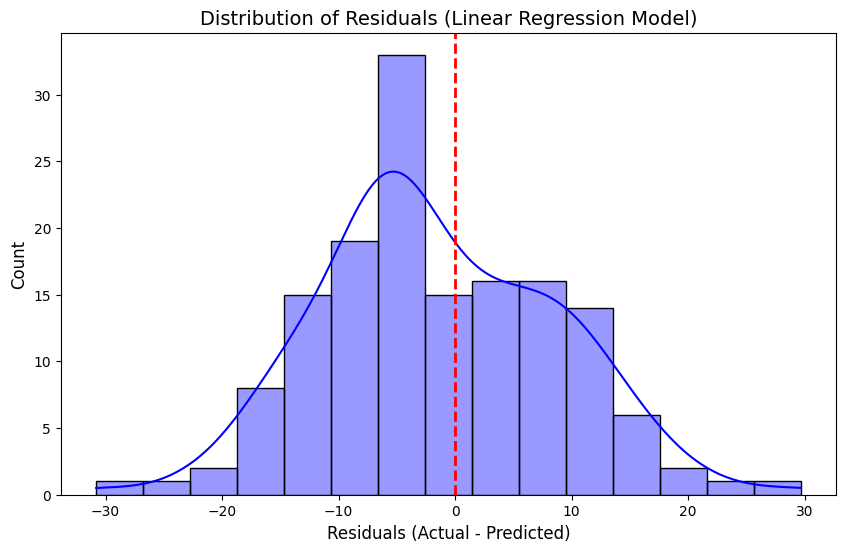

In [69]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=15, kde=True, color='blue', alpha=0.4)

plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

plt.title("Distribution of Residuals (Linear Regression Model)", fontsize=14)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()


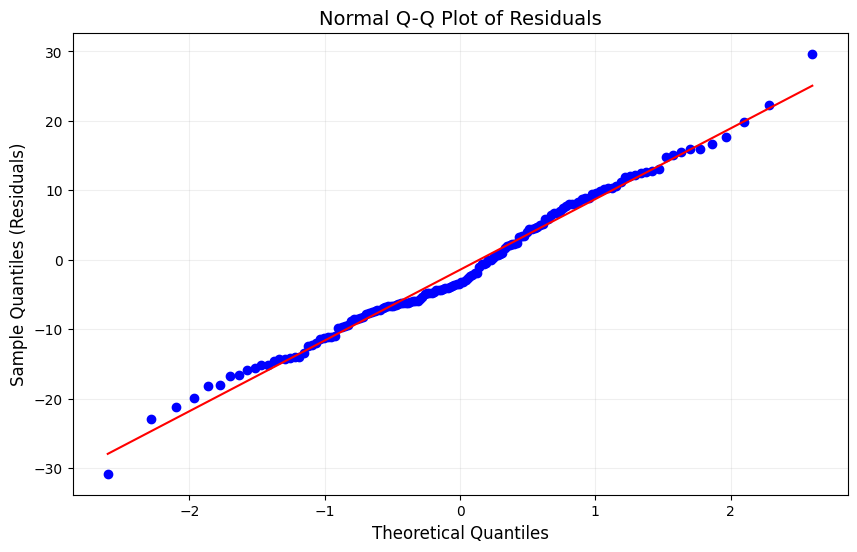

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(10, 6))

stats.probplot(residuals, dist="norm", plot=ax)

ax.set_title("Normal Q-Q Plot of Residuals", fontsize=14)
ax.set_xlabel("Theoretical Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles (Residuals)", fontsize=12)
ax.grid(alpha=0.2)

plt.show()

In [59]:
sample = X_test.iloc[0]
print("Input features:", sample)
print("Predicted spending:", lm.predict([sample])[0])
print("Actual spending:", y_test.iloc[0])

Input features: Avg. Session Length     32.077590
Time on App             10.347877
Time on Website         39.045156
Length of Membership     3.434560
Name: 361, dtype: float64
Predicted spending: 403.66993068818647
Actual spending: 401.0331352191061


c:\Users\Andrew\Desktop\projects\Reg\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
